In [42]:
import sys
sys.path.insert(1, '../../unseen')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns

import array_handling

In [2]:
infile = '/g/data/xv83/dbi599/seatac/tasmax_cafe-c5-d60-pX-f6_19900501-20201101_A-DEC-max_seatac.zarr.zip'

In [3]:
ds = xr.open_zarr(infile)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) datetime64[ns] dask.array<chunksize=(9, 62), meta=np.ndarray>
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 dask.array<chunksize=(1, 9, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [5]:
ds_time = array_handling.reindex_forecast(ds)

In [6]:
ds_time

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, time: 78)
Coordinates:
  * time       (time) datetime64[ns] 1991-05-01 1991-11-01 ... 2029-11-01
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
    lead_time  (init_date, time) float64 0.0 nan 1.0 nan 2.0 ... nan 7.0 nan 8.0
Data variables:
    tasmax     (init_date, time, ensemble) float32 dask.array<chunksize=(1, 78, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [7]:
ds_time['tasmax'].isel({'ensemble': 0, 'init_date': 0}).values

array([28.803467,       nan, 36.737823,       nan, 27.867218,       nan,
       33.875732,       nan, 26.35556 ,       nan, 32.003784,       nan,
       33.724243,       nan, 27.360626,       nan, 39.443665,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)

In [8]:
max_by_year = ds_time['tasmax'].max(dim=('ensemble', 'init_date'), keep_attrs=True)
max_by_year = max_by_year.resample(time='A-DEC').max('time', keep_attrs=True)

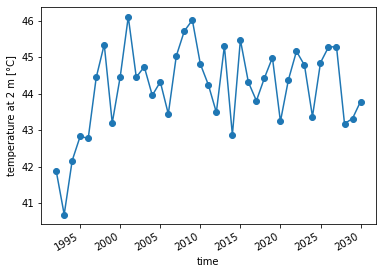

In [9]:
max_by_year.plot(marker='o')

In [10]:
count = ds_time['tasmax'].notnull(keep_attrs=True)
count = count.sum(dim=('ensemble', 'init_date'), keep_attrs=True)
count = count.resample(time='A-DEC').sum('time', keep_attrs=True)

In [11]:
count['time'].values

array(['1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31

In [12]:
count.values

array([ 192,  384,  576,  768,  960, 1152, 1344, 1536, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1536, 1344,
       1152,  960,  768,  576,  384,  192])

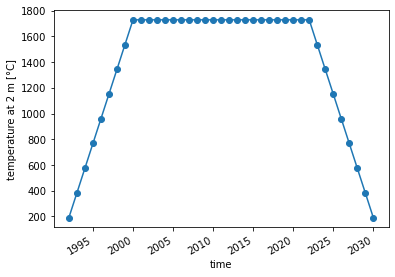

In [13]:
count.plot(marker='o')

In [ ]:
n_repeats = 1000
sample_size= 1000

estimates = {}
for year in np.arange(1999, 2022):
    print(year)
    estimates[year] = []
    for resample in range(n_repeats):
        year_da = ds_time['tasmax'].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
        year_array = year_da.to_masked_array().flatten().compressed()
        population_size = year_array.shape[0]
        random_indexes = np.random.choice(population_size, size=sample_size, replace=False)
        random_indexes.sort()
        txx = year_array[random_indexes].max()
        estimates[year].append(txx)

1999
2000
2001
2002


In [16]:
df = pd.DataFrame.from_dict(estimates)
df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,44.465149,43.522522,44.447266,44.733154,43.949921,44.320557,43.440338,45.030792,43.996185,44.109039,...,43.244690,42.864532,45.469208,44.309845,43.667877,44.425385,44.985229,42.610809,44.380432,45.156891
1,43.558655,46.101166,44.447266,44.733154,42.109039,42.156250,43.130707,45.030792,45.710571,44.109039,...,45.303101,42.864532,44.260254,42.994446,43.802704,44.257324,43.060730,42.759857,44.380432,45.156891
2,44.465149,44.580292,43.090210,43.492554,43.052002,44.320557,43.440338,45.030792,45.710571,43.176392,...,45.303101,42.864532,44.260254,44.309845,43.708832,44.425385,43.956848,43.235138,44.380432,45.156891
3,43.558655,46.101166,44.447266,44.733154,43.949921,43.740906,43.440338,42.624054,43.996185,45.571869,...,45.303101,42.782928,45.469208,44.309845,43.802704,44.425385,44.985229,42.610809,44.380432,44.845276
4,44.465149,46.101166,44.447266,44.733154,43.949921,43.740906,43.440338,45.030792,43.927063,46.012848,...,45.303101,42.814575,44.260254,42.994446,43.708832,44.354431,43.956848,43.235138,43.402893,45.156891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44.465149,46.101166,43.090210,44.733154,43.949921,44.320557,43.440338,45.030792,43.996185,43.799957,...,43.244690,42.864532,45.469208,43.487244,43.294678,44.425385,44.985229,43.235138,43.504272,45.156891
96,44.465149,43.522522,44.447266,44.733154,43.052002,43.086273,43.440338,44.018799,45.710571,46.012848,...,43.173920,42.782928,45.469208,44.309845,43.802704,44.257324,43.240967,43.235138,43.504272,45.067749
97,43.319427,46.101166,42.982971,44.733154,43.052002,44.320557,43.440338,45.030792,43.927063,44.109039,...,45.303101,42.864532,45.469208,43.955841,43.802704,44.425385,44.985229,43.235138,44.380432,45.156891
98,43.721649,46.101166,43.090210,44.733154,43.949921,44.320557,43.440338,45.030792,45.710571,43.481567,...,43.244690,42.782928,45.469208,44.309845,43.667877,44.257324,43.063324,42.759857,44.380432,45.067749


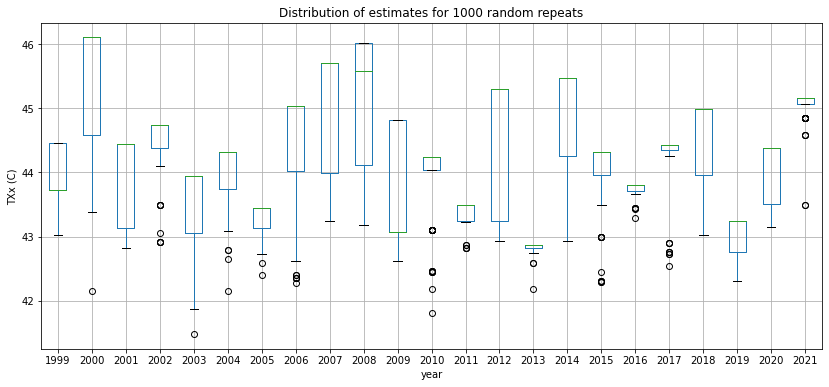

In [20]:
fig = plt.figure(figsize=[14, 6])
df.boxplot()
plt.title('Distribution of estimates for 1000 random repeats')
plt.xlabel('year')
plt.ylabel('TXx (C)')
#plt.savefig(f'/g/data/xv83/dbi599/seatac/tasmax_samples_seatac.pdf', bbox_inches='tight', facecolor='white')
plt.show()

In [21]:
year_da = ds_time['tasmax'].sel(time=slice(f'2000-01-01', f'2000-12-31'))
year_array = year_da.to_masked_array().flatten().compressed()

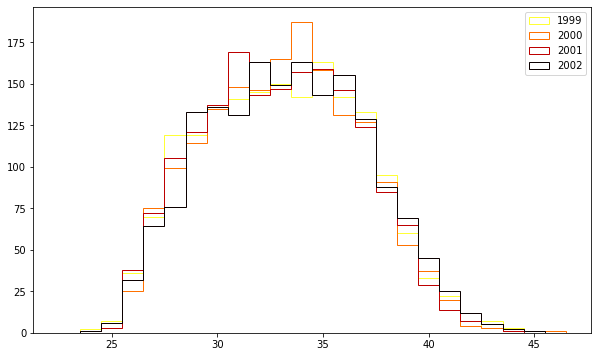

In [36]:
fig = plt.figure(figsize=[10, 6])

years = np.arange(1999, 2003)
color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, len(years))))
for year in years:
    c = next(color)
    year_da = ds_time['tasmax'].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
    year_array = year_da.to_masked_array().flatten().compressed()
    n, bins, pathches = plt.hist(year_array, bins=np.arange(22.5, 47.5), histtype='step', label=str(year), color=c)

plt.legend()

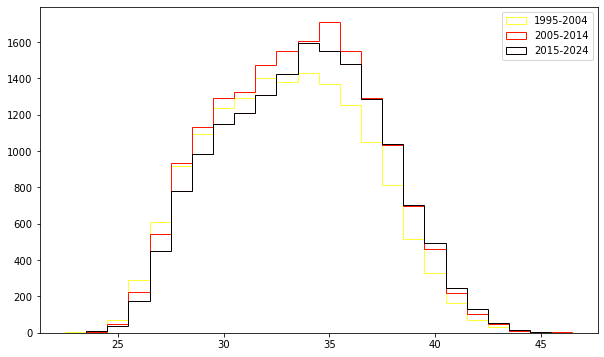

In [38]:
fig = plt.figure(figsize=[10, 6])

color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, 3)))
epochs = [['1995', '2004'], ['2005', '2014'], ['2015', '2024']]

for start, end in epochs:
    c = next(color)
    epoch_da = ds_time['tasmax'].sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    epoch_array = epoch_da.to_masked_array().flatten().compressed()
    n, bins, pathches = plt.hist(epoch_array, bins=np.arange(22.5, 47.5), histtype='step',
                                 label=f'{start}-{end}', color=c)

plt.legend()

In [40]:
data_dict = {}
epochs = [['2000', '2006'], ['2007', '2013'], ['2014', '2020']]
for start, end in epochs:
    epoch_da = ds_time['tasmax'].sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    epoch_array = epoch_da.to_masked_array().flatten().compressed()
    data_dict[f'{start}-{end}'] = epoch_array

data_df = pd.DataFrame.from_dict(data_dict)

In [41]:
data_df

,2000-2006,2007-2013,2014-2020
0,32.641541,32.133942,37.614655
1,38.162018,30.657990,28.598755
2,33.434052,28.932617,35.801849
3,26.146606,29.068146,29.108154
4,36.939636,37.948029,39.773834
...,...,...,...
12091,42.350708,36.038300,35.556580
12092,34.043671,38.135040,34.624390
12093,32.364471,33.782684,38.741119
12094,33.127838,41.805634,34.750519


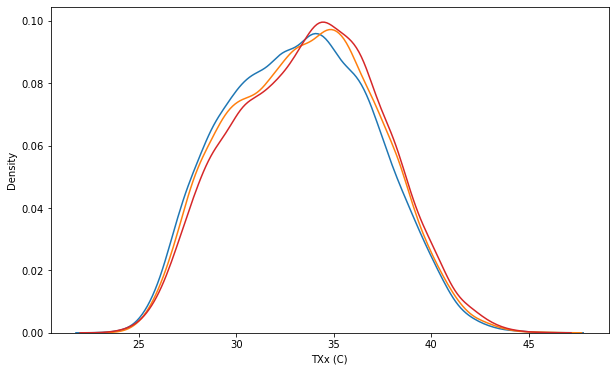

In [75]:
fig = plt.figure(figsize=[10, 6])
sns.kdeplot(data_df['2000-2006'], color='tab:blue')
sns.kdeplot(data_df['2007-2013'], color='tab:orange')
sns.kdeplot(data_df['2014-2020'], color='tab:red')
plt.xlabel('TXx (C)')
plt.show()

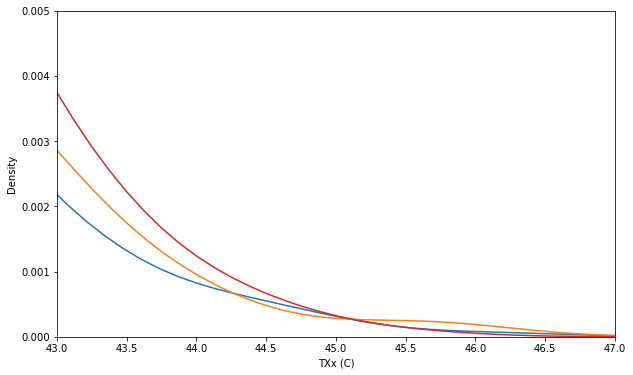

In [74]:
fig = plt.figure(figsize=[10, 6])
sns.kdeplot(data_df['2000-2006'], color='tab:blue')
sns.kdeplot(data_df['2007-2013'], color='tab:orange')
sns.kdeplot(data_df['2014-2020'], color='tab:red')
plt.xlabel('TXx (C)')
plt.ylim(0, 0.005)
plt.xlim(43, 47)
plt.show()

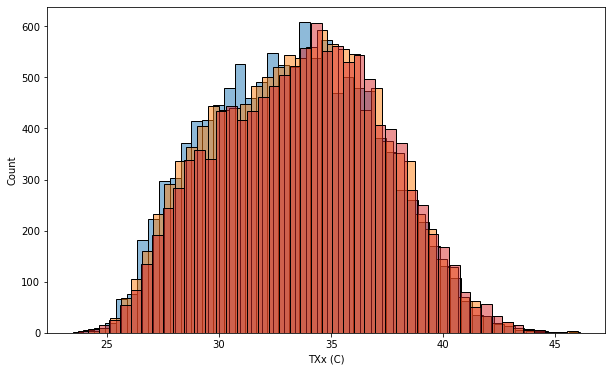

In [76]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(data_df['2000-2006'], color='tab:blue', kde=False, alpha=0.5)
sns.histplot(data_df['2007-2013'], color='tab:orange', kde=False, alpha=0.5)
sns.histplot(data_df['2014-2020'], color='tab:red', kde=False, alpha=0.5)
plt.xlabel('TXx (C)')
plt.show()

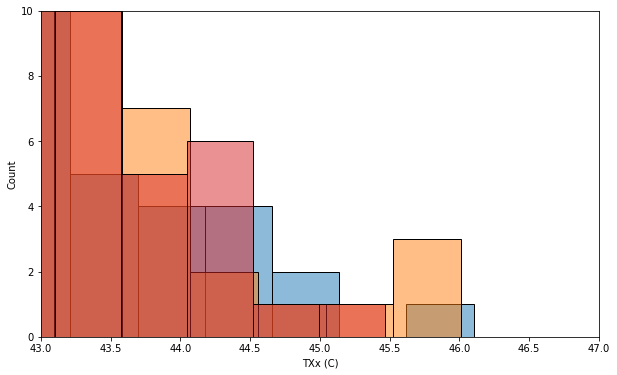

In [77]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(data_df['2000-2006'], color='tab:blue', kde=False, alpha=0.5)
sns.histplot(data_df['2007-2013'], color='tab:orange', kde=False, alpha=0.5)
sns.histplot(data_df['2014-2020'], color='tab:red', kde=False, alpha=0.5)
plt.xlabel('TXx (C)')
plt.ylim(0, 10)
plt.xlim(43, 47)
plt.show()

In [78]:
#sns.load_dataset('tips')